### Лабораторная работа 2: основные понятия

В сегодняшней лабораторной будем работать с данными о проданных на аукционе автомобилях (`Carvana Car Prediction`). Целевым признаком здесь является наличие скрытых продавцом существенных недостатков. 

Carvana &mdash; компания-перекупщик автомобилей, соответственно, ее задача &mdash; не допустить скупку автомобилей со скрытыми недостатками, так как их впоследствии тяжелее продавать.

## 1

Загрузите данные о проданных на аукционе автомобилях. Посмотрите на "сырые" данные. 

Просмотрите файл `DataDictionary-ru.txt` и поймите, что означают столбцы матрицы. Выведите статистику по столбцам.


In [28]:
import pandas as pd
from matplotlib import pyplot as plt

In [29]:
# место для кода
data = pd.read_csv("data.csv",delimiter=",")
data.describe()

,RefId,IsBadBuy,VehYear,VehicleAge,WheelTypeID,VehOdo,MMRAcquisitionAuctionAveragePrice,MMRAcquisitionAuctionCleanPrice,MMRAcquisitionRetailAveragePrice,MMRAcquisitonRetailCleanPrice,MMRCurrentAuctionAveragePrice,MMRCurrentAuctionCleanPrice,MMRCurrentRetailAveragePrice,MMRCurrentRetailCleanPrice,BYRNO,VNZIP1,VehBCost,IsOnlineSale,WarrantyCost
count,72983.000000,72983.000000,72983.000000,72983.000000,69814.000000,72983.000000,72965.000000,72965.000000,72965.000000,72965.000000,72668.000000,72668.000000,72668.000000,72668.000000,72983.000000,72983.000000,72983.000000,72983.000000,72983.000000
mean,36511.428497,0.122988,2005.343052,4.176644,1.494299,71499.995917,6128.909217,7373.636031,8497.034332,9850.928240,6132.081287,7390.681827,8775.723331,10145.385314,26345.842155,58043.059945,6730.934326,0.025280,1276.580985
std,21077.241302,0.328425,1.731252,1.712210,0.521290,14578.913128,2461.992768,2722.491986,3156.285284,3385.789541,2434.567723,2686.248852,3090.702941,3310.254351,25717.351219,26151.640415,1767.846435,0.156975,598.846788
min,1.000000,0.000000,2001.000000,0.000000,0.000000,4825.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,835.000000,2764.000000,1.000000,0.000000,462.000000
25%,18257.500000,0.000000,2004.000000,3.000000,1.000000,61837.000000,4273.000000,5406.000000,6280.000000,7493.000000,4275.000000,5414.000000,6536.000000,7784.000000,17212.000000,32124.000000,5435.000000,0.000000,837.000000
50%,36514.000000,0.000000,2005.000000,4.000000,1.000000,73361.000000,6097.000000,7303.000000,8444.000000,9789.000000,6062.000000,7313.000000,8729.000000,10103.000000,19662.000000,73108.000000,6700.000000,0.000000,1155.000000
75%,54764.500000,0.000000,2007.000000,5.000000,2.000000,82436.000000,7765.000000,9021.000000,10651.000000,12088.000000,7736.000000,9013.000000,10911.000000,12309.000000,22808.000000,80022.000000,7900.000000,0.000000,1623.000000
max,73014.000000,1.000000,2010.000000,9.000000,3.000000,115717.000000,35722.000000,36859.000000,39080.000000,41482.000000,35722.000000,36859.000000,39080.000000,41062.000000,99761.000000,99224.000000,45469.000000,1.000000,7498.000000


## 2

Постройте график рассеяния с пробегом в качестве оси абсцисс и ценой `MMRCurrentRetailAveragePrice` в качестве оси ординат. Автомобили без недостатков отметьте зеленым цветом, со скрытыми недостатками — красным.

In [30]:
%matplotlib inline
import matplotlib.pyplot as plt
data[["VehOdo","MMRCurrentRetailAveragePrice"]]

,VehOdo,MMRCurrentRetailAveragePrice
0,89046,11597.0
1,93593,11374.0
2,73807,7146.0
3,65617,4375.0
4,69367,6739.0
...,...,...
72978,45234,4836.0
72979,71759,10151.0
72980,88500,11831.0
72981,79554,10099.0


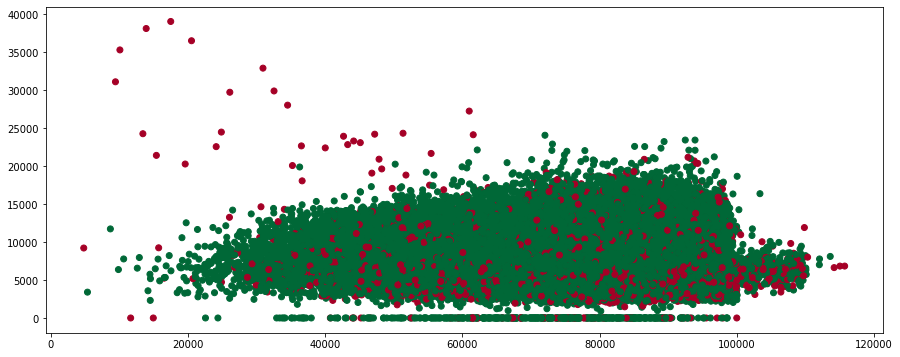

In [31]:
fig, ax = plt.subplots(figsize = (15,6))
ax.scatter(data["VehOdo"], data["MMRCurrentRetailAveragePrice"],c = data["IsBadBuy"], cmap = "RdYlGn_r") 

# Регрессия

## 3a

Импортируйте из библиотеки `sklearn` все модели машинного обучения:

`from sklearn import *`

Трактуя задачу о предсказании наличия недостатков как задачу регрессии, натренируйте линейную модель [`LinearRegression`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) на каком-нибудь подмножестве признаков (например, тех же `VehOdo` и `MMRCurrentRetailAveragePrice`). 

С какой проблемой вы столкнулись? Какие способы ее решения вы можете предложить?

*Функции, которые могут пригодиться при решении: `.fit(), .loc[], pd.notnull()`*

*Создание модели:* `model1 = linear_model.LinearRegression()`

*Тренировка:*
`model1.fit(x, y)`



In [32]:
#Data preprocessing
data_new = data.dropna(subset =["VehOdo","MMRCurrentRetailAveragePrice","IsBadBuy"])
#Here we dropped all the rows which had NA in any of the following columns

In [33]:
# место для кода
from sklearn import linear_model
model_lr = linear_model.LinearRegression(normalize=True)
x = data_new[["VehOdo","MMRCurrentRetailAveragePrice"]]
y = data_new["IsBadBuy"]
model_lr.fit(x,y)

LinearRegression(normalize=True)

## 3b

Выполните предсказание для всех объектов обучающей выборки и присвойте результат переменной prediction

*Функции, которые могут пригодиться при решении: `model.predict()`*

In [34]:
# место для кода
prediction_lrg = model_lr.predict(x)

## 3c

Преобразуйте получившийся вектор предсказаний `prediction` к значениям `{0,1}`. Это можно сделать, например, используя list comprehensions: https://docs.python.org/3/tutorial/datastructures.html#list-comprehensions 

`predictionClass = [1 if prediction[i] > 0.5 else 0 for i in range(prediction.shape[0])]`

In [35]:
# место для кода
prediction_lrg_class = [1 if prediction_lrg[i] > 0.2 else 0 for i in range(prediction_lrg.shape[0])]
prediction_lrg_class

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


## 3d

Постройте отчет по качеству классификации и матрицу ошибок. Как изменятся отчет и матрица ошибок, если изменить порог в задании 3c (по умолчанию его значение равно 0.5)?

*Функции, которые могут пригодиться при решении: `print(metrics.classification_report(...))`, `print(metrics.confusion_matrix(...))`*

Функция classification_report для каждого класса объектов считает точность (precision) в этом классе и полноту (recall). Полнота - это процент объектов данного класса, которые ваш метод предсказания тоже отнес к этому классу, среди всех объектов данного класса. Точность (precision) - то же самое, только среди всех объектов, предсказанных для этого класса.

Функция confusion_matrix возвращает матрицу с количествами объектов. Номера столбцов матрицы - это номера предсказанных классов, строки - это номера правильных классов. Например, элемент M[0,1] - это количество машин, где на самом деле IsBadBuy = 0, а вы предсказали 1.

In [36]:
# место для кода
from sklearn import metrics
print(metrics.classification_report(y,prediction_lrg_class))
print(metrics.confusion_matrix(y,prediction_lrg_class))

              precision    recall  f1-score   support

           0       0.88      0.97      0.92     63724
           1       0.26      0.09      0.13      8944

    accuracy                           0.86     72668
   macro avg       0.57      0.53      0.53     72668
weighted avg       0.81      0.86      0.82     72668

[[61528  2196]
 [ 8166   778]]


# Классификация

## 4a
Трактуя задачу как задачу классификации, постройте модель классификации «решающее дерево» глубины 20  (все аналогично линейной регрессии).


*Функции, которые могут пригодиться при решении: `tree.DecisionTreeClassifier(max_depth=20) `*

In [37]:
# место для кода
from sklearn import tree
model_tree = tree.DecisionTreeClassifier(max_depth=20)
model_tree.fit(x,y)

DecisionTreeClassifier(max_depth=20)

## 4b

Решающее дерево предсказывает вероятности. С помощью построенной модели рассчитайте вероятности наличия скрываемых недостатков.

*Функции, которые могут пригодиться при решении: `model.predict_proba() `*

In [38]:
# место для кода
prediction_tree = model_tree.predict_proba(x)
prediction_tree

array([[0.89317804, 0.10682196],
       [1.        , 0.        ],
       [0.85810056, 0.14189944],
       ...,
       [0.89317804, 0.10682196],
       [0.86746988, 0.13253012],
       [0.93789474, 0.06210526]])

## 4c

Преобразуйте получившийся вектор предсказаний `prediction` к значениям `{0,1}`. Постройте отчет о классификации и матрицу ошибок. Какой метод оказался лучше?

In [39]:
# место для кода
prediction_tree_class = [1 if prediction_tree[i][1] > prediction_tree[i][0] else 0 for i in range(prediction_tree.shape[0])]
prediction_tree_class
print(metrics.classification_report(y,prediction_tree_class))
print(metrics.confusion_matrix(y,prediction_tree_class))

              precision    recall  f1-score   support

           0       0.91      1.00      0.95     63724
           1       0.96      0.31      0.47      8944

    accuracy                           0.91     72668
   macro avg       0.94      0.65      0.71     72668
weighted avg       0.92      0.91      0.89     72668

[[63622   102]
 [ 6185  2759]]


Очевидно, что лучше в общем показало себя дерево!

# Кросс-валидация
## 5a


Разделите исходную выборку на две части, например, используя [slices](https://pythonz.net/references/named/slice/):

`dataTrain = data.loc[0:34999,]
dataTest = data.loc[35000:69999,]`

In [40]:
# место для кода
from sklearn.model_selection import cross_validate,train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

## 5b

Натренируйте решающее дерево на  `dataTrain` и примените к  `dataTrain` и dataTest, вычислив для каждого случая точность предсказания. 

Проведите несколько экспериментов для различных глубин дерева. Напишите в комментариях, для каких глубин модель недообучена, для каких переобучена и где точка раннего останова.

*Функции, которые могут пригодиться при решении: `metrics.accuracy_score() `*

In [41]:
# место для кода
#Точка останова - около 60
for i in range(1,15,1):
    print("------------------------I is "+str(i)+"----------------------")
    model3 = tree.DecisionTreeClassifier(max_depth=i)
    model3.fit(x_train,y_train)
    prediction_tree_2 = model3.predict_proba(x_test)
    prediction_class_tree_3 = [1 if prediction_tree_2[i][1] > prediction_tree_2[i][0] else 0 for i in range(prediction_tree_2.shape[0])]
    print(metrics.accuracy_score(y_test,prediction_class_tree_3))
    print(metrics.classification_report(y_test,prediction_class_tree_3))
    print(metrics.confusion_matrix(y_test,prediction_class_tree_3))

------------------------I is 1----------------------
0.8763141960697969
              precision    recall  f1-score   support

           0       0.88      1.00      0.93     15920
           1       0.00      0.00      0.00      2247

    accuracy                           0.88     18167
   macro avg       0.44      0.50      0.47     18167
weighted avg       0.77      0.88      0.82     18167

[[15920     0]
 [ 2247     0]]
------------------------I is 2----------------------
0.8763141960697969
              precision    recall  f1-score   support

           0       0.88      1.00      0.93     15920
           1       0.00      0.00      0.00      2247

    accuracy                           0.88     18167
   macro avg       0.44      0.50      0.47     18167
weighted avg       0.77      0.88      0.82     18167

[[15920     0]
 [ 2247     0]]
------------------------I is 3----------------------


c:\python37\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\python37\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


0.8758187923157373
              precision    recall  f1-score   support

           0       0.88      1.00      0.93     15920
           1       0.24      0.00      0.00      2247

    accuracy                           0.88     18167
   macro avg       0.56      0.50      0.47     18167
weighted avg       0.80      0.88      0.82     18167

[[15907    13]
 [ 2243     4]]
------------------------I is 4----------------------
0.8762591512082347
              precision    recall  f1-score   support

           0       0.88      1.00      0.93     15920
           1       0.44      0.00      0.00      2247

    accuracy                           0.88     18167
   macro avg       0.66      0.50      0.47     18167
weighted avg       0.82      0.88      0.82     18167

[[15915     5]
 [ 2243     4]]
------------------------I is 5----------------------
0.8759839269004238
              precision    recall  f1-score   support

           0       0.88      1.00      0.93     15920
           1

# Решающая функция
## 6a

Вернемся к модели решающего дерева глубины 20, построенного по всей обучающей выборке `data`. Пусть цена ошибки неправильного предсказания 0 равна 1000, а неправильного предсказания 1 — 100.

Вычислите функцию потерь &mdash; среднюю ошибку на всей обучающей выборке.

In [51]:
model_tree = tree.DecisionTreeClassifier(max_depth=4)
model_tree.fit(x_train,y_train)
prediction_tree = model_tree.predict_proba(x_test)
prediction_tree_class = [1 if prediction_tree[i][1] > prediction_tree[i][0] else 0 for i in range(prediction_tree.shape[0])]

# место для кода
def loss_function(y_pred,y):
    res = 0
    ct = 0
    for i_pred, i in zip(y_pred,y):
        if (i_pred != i):
            ct+=1
            if i_pred > i:
                res += 100
            else :
                res += 1000
    #print(ct)
    return res/y.shape[0]
y_test
res = loss_function(prediction_tree_class,y_test)
res

123.4931469147355

## 6b

Выясните, как нужно изменить решающую функцию `[0 if predictionProb[i][0] > 0.5 else 1 for i in range(prediction.shape[0])]`, чтобы функция потерь была минимальна?

Найдите оптимальную решающую функцию и минимальное значение функционала потерь методом подбора или пользуясь формулой из лекции 2 (слайд Decision function).



In [57]:
# место для кода
import numpy as np
r = np.arange(0.,1.,0.01)
prediction_tree = model_tree.predict_proba(x_test)
res = []
for i in r:
    prediction_tree_class = [1 if prediction_tree[z][0] > i else 0 for z in range(prediction_tree.shape[0])]
    print(i)
    res.append(loss_function(prediction_tree_class,y_test))
    print(res[-1])
    



0.0
87.84609456707216
0.01
87.84609456707216
0.02
87.84609456707216
0.03
87.84609456707216
0.04
87.84609456707216
0.05
87.84609456707216
0.06
87.84609456707216
0.07
87.84609456707216
0.08
87.84609456707216
0.09
87.84609456707216
0.1
87.84609456707216
0.11
87.84609456707216
0.12
87.84609456707216
0.13
87.84609456707216
0.14
87.84609456707216
0.15
87.84609456707216
0.16
87.84609456707216
0.17
87.84609456707216
0.18
87.84609456707216
0.19
87.84609456707216
0.2
87.84609456707216
0.21
87.84609456707216
0.22
87.84609456707216
0.23
87.84609456707216
0.24
87.84609456707216
0.25
87.84609456707216
0.26
87.84609456707216
0.27
87.84609456707216
0.28
87.84609456707216
0.29
87.84609456707216
0.3
87.84609456707216
0.31
87.84609456707216
0.32
87.84609456707216
0.33
87.84609456707216
0.34
87.84609456707216
0.35000000000000003
87.84609456707216
0.36
87.84609456707216
0.37
87.8240766224473
0.38
87.8240766224473
0.39
87.8240766224473
0.4
87.8240766224473
0.41000000000000003
87.8240766224473
0.42
87.824076

In [58]:
np.min(res)

87.8240766224473